# **Machine Learning Model for Predicting E-Commerce Customer Churn**

In this notebook, our goal is to explore and implement the best machine learning models suitable for predicting customer churn using the E-commerce Customer Churn Dataset. This project is part of Purwadhika's Digital Talent Incubator (DTI) Data Science program, specifically Capstone 3.

## **Table Of Content**


1. Business Problem Understanding
    <br> 1.1. Context
    <br> 1.2. Problem Statements
    <br> 1.3. Objectives
    <br> 1.4. Analytical Approach
    <br> 1.5. Evaluation Metric
2. Data Understanding
    <br> 2.1. Feature Details
    <br> 2.2. Descriptive Analysis
3. Data Preprocessing
    <br> 3.1. Data Cleaning
    <br> 3.2. Handling Missing Values
    <br> 3.3. Handling Outliers
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Selection and Training
7. Model Evaluation
8. Conclusion and Recommendation


## **1. Business Problem Understanding**

### **1.1. Context** 

The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.

### **1.2. Problem Statement**

### **1.3. Objectives**

### **1.4. Analytical Approach**

### **1.5. Evaluation Metric**

label negatif -> customer cabut
lebih baik salah memprediksi ke churn an customer. lost konsumen. lebih baik false positif



recall -> f2

## **2. Data Understanding**

The dataset consists of user information (e.g., tenure, marital status) and transaction-related data (e.g., preferred order category, satisfaction score, days since last order). Each record represents a user profile and their transactions, indicating whether the user has churned.

### **2.1. Feature Details**

| **Attribute**             | **Data Type**  |  **Description**                                                                |
|---------------------------|----------------|---------------------------------------------------------------------------------|
| Tenure                    | float64        | Tenure of a customer in the company.                                            |
| WarehouseToHome           | float64        | Distance between the warehouse to the customer’s home.                          |
| NumberOfDeviceRegistered  | int64          | Total number of deceives is registered on a particular customer.                |
| PreferedOrderCat          | object         | Preferred order category of a customer in the last month.                       |
| SatisfactionScore         | int64          | Satisfactory score of a customer on service.                                    |
| MaritalStatus             | object         | Marital status of a customer.                                                   |
| NumberOfAddress           | int64          | Total number of address on a particular customer.                               |
| Complaint                 | int64          | Any complaint has been raised in the last month.                                |
| DaySinceLastOrder         | float64        | Day since last order by customer.                                               |
| CashbackAmount            | float64        | Discount offered on that specific product.                                      |
| Churn                     | int64          | Churn flag.                                                                     |

In [90]:
# Import Libraries and Configure Settings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [91]:
# Load the dataset

df = pd.read_csv('dataset/data_ecommerce_customer_churn.csv')
df.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [92]:
# Get number of rows and columns

print('Number of Rows and Columns:',df.shape)

Number of Rows and Columns: (3941, 11)


### **2.2. Descriptive Analysis**

In [93]:
# Identifying Null and Unique Values

pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': (df.isna().mean().values * 100).round(2),
    'negative': [True if pd.api.types.is_integer_dtype(df[col]) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Tenure,float64,4.92,False,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,float64,4.29,False,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,int64,0.00,False,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0.00,False,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,int64,0.00,False,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0.00,False,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0.00,False,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0.00,False,2,"[0, 1]"
8,DaySinceLastOrder,float64,5.40,False,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,float64,0.00,False,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [94]:
# Displaying Descriptive Analysis for Numerical Attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


In [95]:
# Displaying Descriptive Analysis for Categorical Attributes

df.describe(include=object).T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


In [96]:
# Showing each value of PreferedOrderCat 

df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [97]:
# Showing each value of MaritalStatus 

df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

## **3. Data Preprocessing**

In this step, we will remove duplicate data entries, handle missing values through imputation, and eliminate outliers to improve the generalization of our model.

### **3.1. Data Cleaning**

In [98]:
# Checking for duplicates
print(f'Duplicated data: {df.duplicated().sum()}')
print(f'Duplicated data percentage: {df.duplicated().sum()/len(df)*100:.2f}%')

Duplicated data: 671
Duplicated data percentage: 17.03%


In [99]:
# Dropping duplicates
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

### **3.2. Handling Missing Values**

In [100]:
# Get the percentage of missing data per column.
((df.isnull().sum() / df.shape[0]) * 100).round(2).astype(str) + '%'

Tenure                      4.89%
WarehouseToHome             4.13%
NumberOfDeviceRegistered     0.0%
PreferedOrderCat             0.0%
SatisfactionScore            0.0%
MaritalStatus                0.0%
NumberOfAddress              0.0%
Complain                     0.0%
DaySinceLastOrder           5.54%
CashbackAmount               0.0%
Churn                        0.0%
dtype: object

<Axes: >

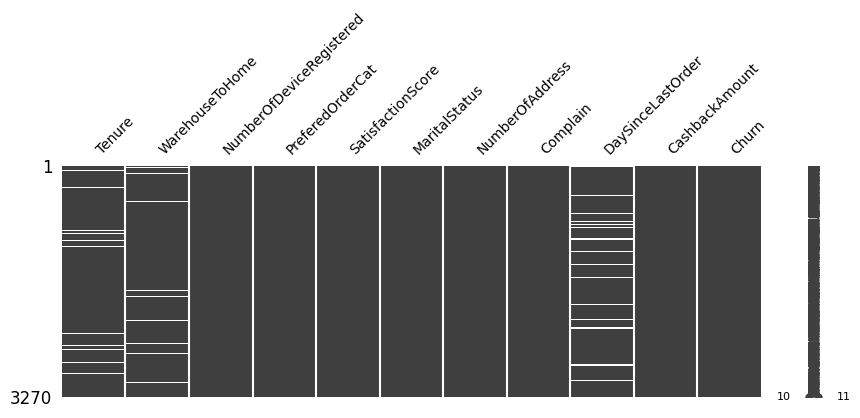

In [101]:
# Identifyng missing data pattern using matrix plot
msn.matrix(df, figsize=(10,3), fontsize=10)

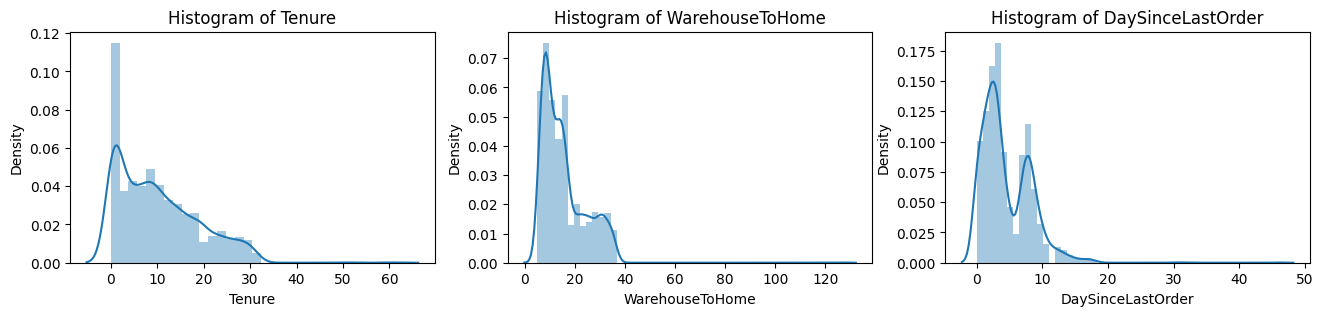

In [102]:
# Plot distribution of attributes that contains missing values
missing_val_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
numerical_data  = df[missing_val_cols]

fig, axes = plt.subplots(1, 3, figsize=(16, 3))

axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.distplot(numerical_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.show()

Since those three columns are not normally distributed, we'll fill the missing values with the median.

In [103]:
# Fill missing value with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

### **3.3. Handling Outliers**

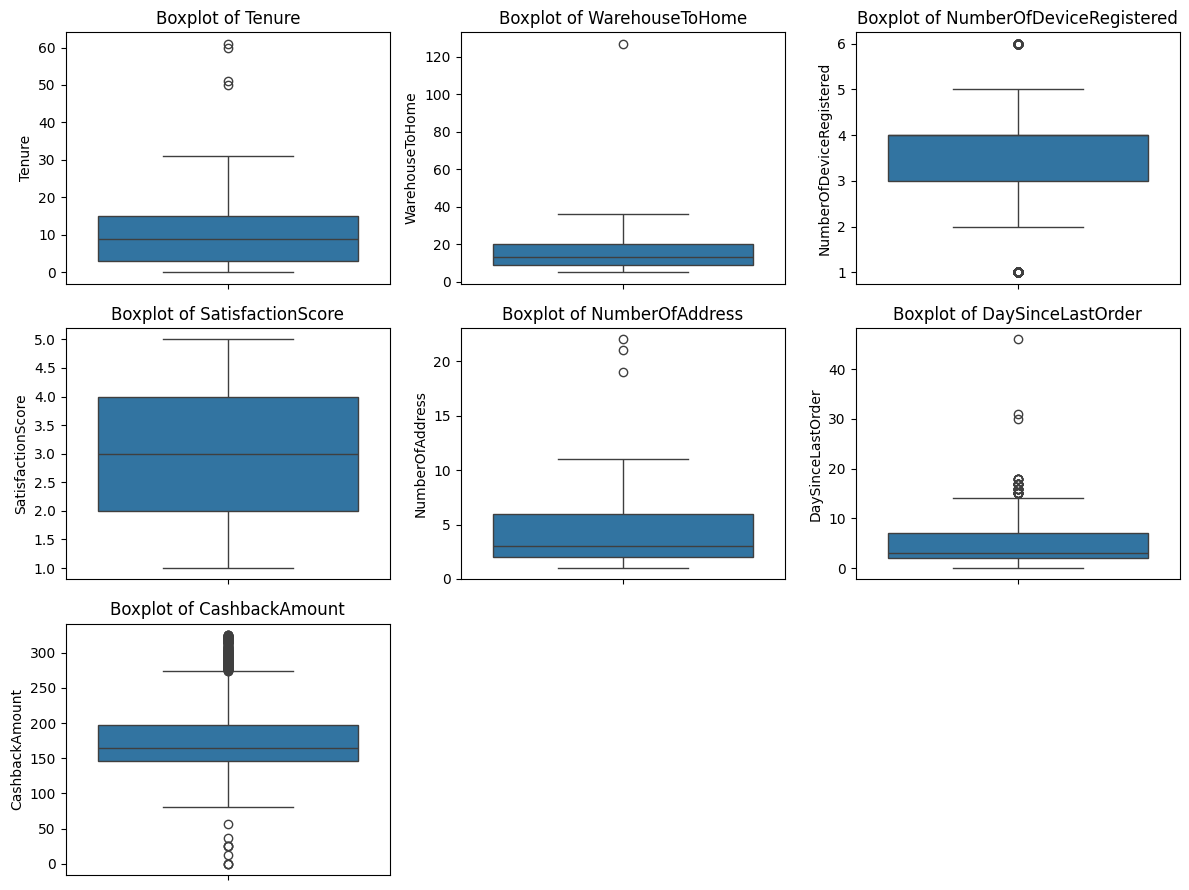

In [104]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
    'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',  'CashbackAmount']

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 3))

for i, column in enumerate(numerical_cols):
    row, col = divmod(i, 3)  # Calculate row and column index
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Remove any unused subplots
if num_cols % 3 != 0:
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[j])

fig.tight_layout()

plt.show()

From the boxplots above, we identified statistical outliers in columns such as `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `DaySinceLastOrder`, and `CashbackAmount`. The most apparent outliers are in `Tenure`, `WarehouseToHome`, and `NumberOfAddress`. However, for `NumberOfDeviceRegistered`, `DaySinceLastOrder`, and `CashbackAmount`, we cannot conclusively identify values as outliers based on their distribution since the values represent valid information, and removing the respective records is not necessary.

In [105]:
# Define function to remove outliers
def handle_outliers(df , column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + IQR * 1.5
    lower = Q1 - IQR * 1.5

    new_df = df[ (df[column_name] > lower) & (df[column_name] < upper) ]
    return new_df

In [106]:
# Removing outliers for Tenure, WarehouseToHome and WarehouseToHome attributes
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'WarehouseToHome']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0


## **4. Exploratory Data Analysis**

## **5. Feature Engineering**

### **5.1. Feature Selection** 

### **5.2. Data Transformation** 

#### **Data Splitting**

Before transforming the data, let's split it into training and testing sets.

In [107]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis = 1)
y = df['Churn']

We'll split the data into an 80:20 ratio for training and testing, respectively, and define a `random_state` for result consistency and reproducibility.

In [108]:
# Define constant for random state
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state = RANDOM_STATE
)

#### **Data Encoding and Standardization**

Column Treatments:

1. Categorical Columns: For `PreferedOrderCat` and `MaritalStatus`, we will encode them using **BinaryEncoder**.
2. Numerical Columns: For `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `DaySinceLastOrder`, and `CashbackAmount`, we will apply normalization using **MinMaxScaler**.
3. Remainder Columns: For `NumberOfDeviceRegistered`, `SatisfactionScore` and `Complain`, we will leave them as they are.

In [109]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder

numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfAddress',
    'DaySinceLastOrder', 'CashbackAmount']

transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['PreferedOrderCat', 'MaritalStatus']),
    ('scaler', MinMaxScaler(), numerical_cols)
], remainder='passthrough')

Applying column transformer:

In [110]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfAddress', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

Showing transformation and stardardization result:

In [111]:
encoded_cols = list(transformer.transformers_[0][1].get_feature_names_out())
normalized_cols = list(transformer.transformers_[1][1].get_feature_names_out())
remainder_cols = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']

In [112]:
features = encoded_cols + normalized_cols + remainder_cols
X_train_transformed.columns = features
X_test_transformed.columns = features
X_test_transformed.head(5)

,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,MaritalStatus_0,MaritalStatus_1,Tenure,WarehouseToHome,NumberOfAddress,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore,Complain
0,0.0,1.0,0.0,1.0,0.0,0.225806,0.451613,0.05,0.021739,0.573187,3.0,3.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.129032,0.032258,0.05,0.065217,0.435336,3.0,5.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.161290,0.419355,0.20,0.065217,0.457122,4.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.290323,0.741935,0.20,0.021739,0.373304,3.0,3.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.032258,0.193548,0.15,0.065217,0.471368,2.0,5.0,0.0


### **5.3. Imbalance Data Handling** 

#### **Evaluate Model on Imbalanced Dataset**

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, make_scorer, fbeta_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

xgb = XGBClassifier(random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)

In [114]:
def get_f2_score(y_true, y_pred):
    f2_scores = fbeta_score(y_true, y_pred, beta=2, average=None)
    f2_score_avg = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    
    for i, score in enumerate(f2_scores):
        print(f'F2 Score for class {i}: {score:.2f}')
    
    print(f'F2 Score Average: {f2_score_avg:.2f}')

##### XGBoost

In [115]:
model = Pipeline([
    ('transformer', transformer),
    ('estimator', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       544
           1       0.73      0.72      0.72       109

    accuracy                           0.91       653
   macro avg       0.84      0.83      0.83       653
weighted avg       0.91      0.91      0.91       653

F2 Score for class 0: 0.95
F2 Score for class 1: 0.72
F2 Score Average: 0.91


#### Random Forest

In [116]:
model = Pipeline([
    ('transformer', transformer),
    ('estimator', rf)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       544
           1       0.76      0.65      0.70       109

    accuracy                           0.91       653
   macro avg       0.84      0.80      0.82       653
weighted avg       0.90      0.91      0.90       653

F2 Score for class 0: 0.95
F2 Score for class 1: 0.67
F2 Score Average: 0.91


#### **Checking Class Distribution**

In [117]:
from collections import Counter

class_counts = Counter(df['Churn'])
total_samples = len(df['Churn'])

class_dist_percentage = {key: round((count / total_samples) * 100, 2) for key, count in class_counts.items()}
print(f"Class distribution %: {class_dist_percentage}")

Class distribution %: {0: 83.64, 1: 16.36}


Based on the class distribution above, we can conclude that the data is moderately imbalanced.

> Most of the contemporary works in class imbalance concentrate on imbalance ratios
ranging from 1:4 up to 1:100. [...] In real-life applications such as fraud detection
or cheminformatics we may deal with problems with imbalance ratio ranging from
1:1000 up to 1:5000.<br><br>
— Learning From Imbalanced Data: Open Challenges And Future Directions, 2016.

#### **Choosing Optimal Resampling Technique**

Machine learning algorithms typically expect balanced class distributions for effective classification. When class imbalances occur, minority class examples may be overlooked, affecting model performance. Data sampling techniques adjust training datasets to address class imbalances, allowing standard algorithms to train effectively without modification. 
<br><br>
The following code aims to identify the optimal resampling method using XGBoost.


> XGBoost algorithm is efficient and flexible. It can be used for both classification and regression tasks, such as churn prediction. XGBoost provides accurate results and captures non-linear relationships. <br><br>
— [Datacamp: Machine Learning Cheat Sheethttps://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet](), 2022.

In [118]:
# Import libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [119]:
f2_scorer = make_scorer(fbeta_score, beta=2)

smote = SMOTE(random_state=RANDOM_STATE)
ROS = RandomOverSampler(random_state=RANDOM_STATE)
RUS = RandomUnderSampler(random_state=RANDOM_STATE)
NM = NearMiss()

resampling_methods = [smote, ROS, RUS, NM]
resampling_names = ['SMOTE', 'ROS', 'RUS', 'NM']

estimators = [
    ('XGBoost', XGBClassifier(random_state=RANDOM_STATE)), 
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE))
]

model_score = []
f2_score = []
std = []
resampling_names_with_estimators = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for method, resampling_name in zip(resampling_methods, resampling_names):
    for est_name, estimator in estimators:
        model_pipe = ImbPipeline([
            ('transformer', transformer),
            ('resampling', method),
            ('estimator', estimator)
        ])
        
        pipecv = cross_val_score(model_pipe, X_train, y_train, cv=cv, scoring=f2_scorer)
        
        model_score.append(pipecv)
        f2_score.append(pipecv.mean())
        std.append(pipecv.std())
        resampling_names_with_estimators.append(f"{resampling_name} + {est_name}")

f2_scores = pd.DataFrame({
    'Method': resampling_names_with_estimators,
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

f2_scores

,Method,F2 Score,Std
5,RUS + Random Forest,0.755619,0.031654
4,RUS + XGBoost,0.741479,0.035837
2,ROS + XGBoost,0.702178,0.051548
3,ROS + Random Forest,0.692967,0.032329
0,SMOTE + XGBoost,0.686136,0.044495
1,SMOTE + Random Forest,0.657069,0.032946
7,NM + Random Forest,0.619662,0.031338
6,NM + XGBoost,0.618104,0.034847


The **Random Under Sampling** with **Random Forest** method achieved the highest F2 Score of 75%.

In [120]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       544
           1       0.48      0.89      0.63       109

    accuracy                           0.82       653
   macro avg       0.73      0.85      0.75       653
weighted avg       0.89      0.82      0.84       653

F2 Score for class 0: 0.84
F2 Score for class 1: 0.76
F2 Score Average: 0.82


In [121]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       544
           1       0.48      0.89      0.63       109

    accuracy                           0.82       653
   macro avg       0.73      0.85      0.75       653
weighted avg       0.89      0.82      0.84       653

F2 Score for class 0: 0.84
F2 Score for class 1: 0.76
F2 Score Average: 0.82


## **6. Model Selection and Training**

#### **Defining Models for Benchmarking**

We'll use the following models to find the most suitable with the best performance:

Base Models:
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors (KNN)

Ensemble Model - Various Types:
1. Soft Voting of Logistic Regression, Decision Tree, and KNN
2. Stacked Method of Logistic Regression, Decision Tree, and KNN

Ensemble Model - Same Type (Bagging):
1. Random Forest

Ensemble Method - Same Type (Boosting):
1. AdaBoost
2. XGBoost
3. Gradient Boosting

#### **Initiate Models**

In [122]:
# Import models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [123]:
# Base models
logreg = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

# Ensemble models - Various Type (Soft Voting)
vc = VotingClassifier(estimators=[
    ('dtree', dtree),
    ('knn', knn),
    ('lr', logreg)
], voting='soft')

# Ensemble models - Various Type (Stacking)
sc = StackingClassifier(estimators=[ 
    ('dtc', dtree),
    ('knn', knn),
    ('lr', logreg)
])

# Ensemble models - Same Type (Bagging)
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# Ensemble models - Same Type (Boosting)
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb = XGBClassifier(random_state=RANDOM_STATE)

#### **Applying Cross-Validation for Each Model**

In [124]:
f2_scorer = make_scorer(fbeta_score, beta=2)

model_list = [dtree, knn, logreg, vc, sc, rf, ada, gbc, xgb]
model_names = ['DTree', 'KNN', 'LogReg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']

f2_score = []
std = []

RUS = RandomUnderSampler()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for model in model_list:
    model_pipe = ImbPipeline([
        ('transformer', transformer),
        ('resampling', RUS),
        ('estimator', model)
    ])
    
    pipecv = cross_val_score(model_pipe, X_train, y_train, cv=cv, scoring=f2_scorer)
    
    f2_score.append(pipecv.mean())
    std.append(pipecv.std())

f2_scores = pd.DataFrame({
    'Model': model_names,
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

f2_scores

,Model,F2 Score,Std
5,RandForest,0.754952,0.025165
8,XGB,0.738896,0.033999
7,GBC,0.734672,0.044909
4,StackClf,0.709984,0.036457
6,ADA,0.702328,0.041185
3,VotingClf,0.692147,0.028723
0,DTree,0.677536,0.020987
2,LogReg,0.675154,0.040244
1,KNN,0.592408,0.055039


## **7. Model Evaluation** 

#### **Apply Best Model**

In [125]:
# Evaluate model using Random Forest 
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', rf)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       544
           1       0.51      0.88      0.65       109

    accuracy                           0.84       653
   macro avg       0.74      0.86      0.77       653
weighted avg       0.90      0.84      0.85       653

F2 Score for class 0: 0.86
F2 Score for class 1: 0.77
F2 Score Average: 0.84


confusion matrix, Fbeta-score, ROC AUC, PR Score

#### **Apply Hyperparameter Tuning**

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

hyperparam_space = {
    # 'estimator__n_estimators': np.arange(50, 500, 10),
    'estimator__max_depth': np.arange(1, 20),
    'estimator__min_samples_split': np.arange(2, 20),
    'estimator__min_samples_leaf': np.arange(1, 20),
    'estimator__max_features': ['sqrt', 'log2', None]
}

f2_scorer = make_scorer(fbeta_score, beta=2)
skf = StratifiedKFold(n_splits=5)

model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', rf)
])

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2_scorer,
    n_jobs=-1,
    random_state=0,
    n_iter=30
)

In [61]:
# random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('scaler',
                                                                               MinMaxScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'CashbackAmount'...
                   param_distributions={'estimator__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'estimator__max_features': ['sqrt',
                                                                    'log2',
                                                                    None],
                                        'estimator__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'estimator__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [62]:
best_score = random_search.best_score_
best_params = random_search.best_params_
print("Best Score:", best_score)
print("Best Hyperparameters:", best_params)

Best Score: 0.7315225128556981
Best Hyperparameters: {'estimator__min_samples_split': 11, 'estimator__min_samples_leaf': 5, 'estimator__max_features': None, 'estimator__max_depth': 7}


In [63]:
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       544
           1       0.48      0.87      0.62       109

    accuracy                           0.82       653
   macro avg       0.73      0.84      0.75       653
weighted avg       0.89      0.82      0.84       653



In [65]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
feature_importances = best_rf.named_steps['estimator'].feature_importances_


feature_names = X_train.columns
feature_importance_data = [{'Feature': feature_name, 'Importance': importance} 
                        for feature_name, importance in zip(feature_names, feature_importances)]

df_feature_importance = pd.DataFrame(feature_importance_data)

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

                    Feature  Importance
5             MaritalStatus    0.493279
9            CashbackAmount    0.140893
8         DaySinceLastOrder    0.061968
7                  Complain    0.050816
6           NumberOfAddress    0.041838
4         SatisfactionScore    0.009803
2  NumberOfDeviceRegistered    0.009578
1           WarehouseToHome    0.007597
3          PreferedOrderCat    0.006919
0                    Tenure    0.004371


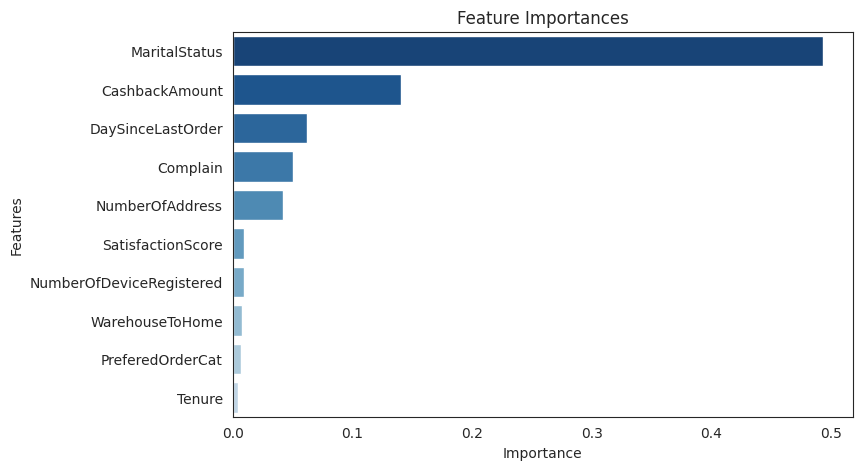

In [66]:
plt.figure(figsize=(8, 5))

sns.set_style('white')
palette = sns.color_palette("Blues",n_colors=13)
palette.reverse()

sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette=palette)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

#### **Apply Best Parameter** 

In [126]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RUS),
    ('estimator', rf)
])

params = {
    'estimator__n_estimators': 470,
    'estimator__min_samples_split': 8,
    'estimator__min_samples_leaf': 3,
    'estimator__max_features': None, 
    'estimator__max_depth': 10
}

model.set_params(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       544
           1       0.52      0.88      0.65       109

    accuracy                           0.84       653
   macro avg       0.75      0.86      0.78       653
weighted avg       0.90      0.84      0.86       653

F2 Score for class 0: 0.86
F2 Score for class 1: 0.77
F2 Score Average: 0.85


In [127]:
model = ImbPipeline([
    ('transformer', transformer),
    ('resampling', smote),
    ('estimator', rf)
])

params = {
    'estimator__n_estimators': 470,
    'estimator__min_samples_split': 8,
    'estimator__min_samples_leaf': 3,
    'estimator__max_features': None, 
    'estimator__max_depth': 10
}

model.set_params(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
get_f2_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       544
           1       0.61      0.83      0.71       109

    accuracy                           0.89       653
   macro avg       0.79      0.87      0.82       653
weighted avg       0.91      0.89      0.89       653

F2 Score for class 0: 0.91
F2 Score for class 1: 0.78
F2 Score Average: 0.89


TODO:
- change xgb to random_forest in resampling
- do all step then add resampling later choose 2 algorithm (xbg and rf)
- smote tend to overfit
- feature selection reduce 5 least importance feature using permutation

